# 1. Настройка окружения

In [1]:
import time
import random
random.seed(180498)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
sb.set(rc={'figure.figsize':(12, 8)})

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA, TruncatedSVD

# Простые ML-модели
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ансамблевые ML-модели
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import sklearn.metrics as skm

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler

In [2]:
## Загрузка данных
dataset = pd.read_csv("creditcard.csv")

# 2. Первоначальная оценка данных

In [3]:
## Оценка данных
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Вывод:** Данное процентное соотношение показывает, что имеет местозначительный дисбаланс классов с целевой переменной. По-прежнему остается неизменным тот факт, что большинство мошеннических действий происходят гораздо реже, чем немошеннические.

In [4]:
## Анализ целевой переменной (доля валидных и мошеннических транзакций)
dataset['Class'].value_counts(normalize=True) * 100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

**Важно:** Никаких дополнительных полезных данных, кроме суммы транзакции и времени совершения транзакции в исходных данных нет, поэтому для отбора признаков будут использоваться именно эти данные. В дальнейшем будет целесообразно преобразовать переменные с использованием логарифмической шкалы.

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


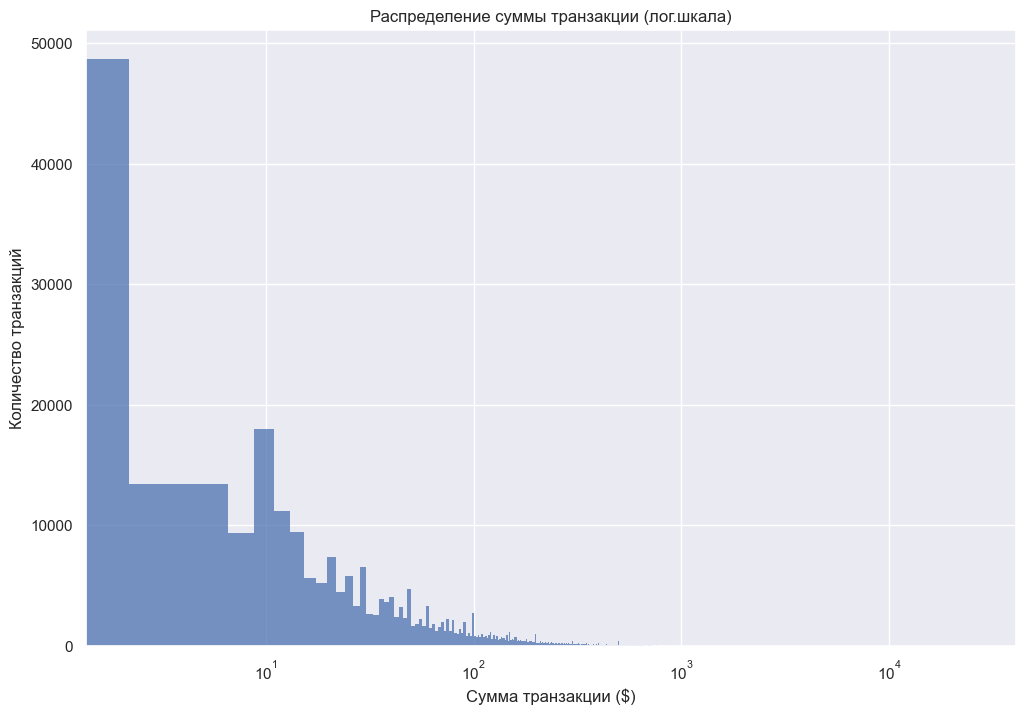

In [5]:
## Выделение признаков

# Basic statistics
print(dataset['Amount'].describe())

# Распределение
sb.histplot(data=dataset, x='Amount').set(xscale="log")
plt.xlabel("Сумма транзакции ($)")
plt.ylabel("Количество транзакций")
plt.title("Распределение суммы транзакции (лог.шкала)")
plt.show()

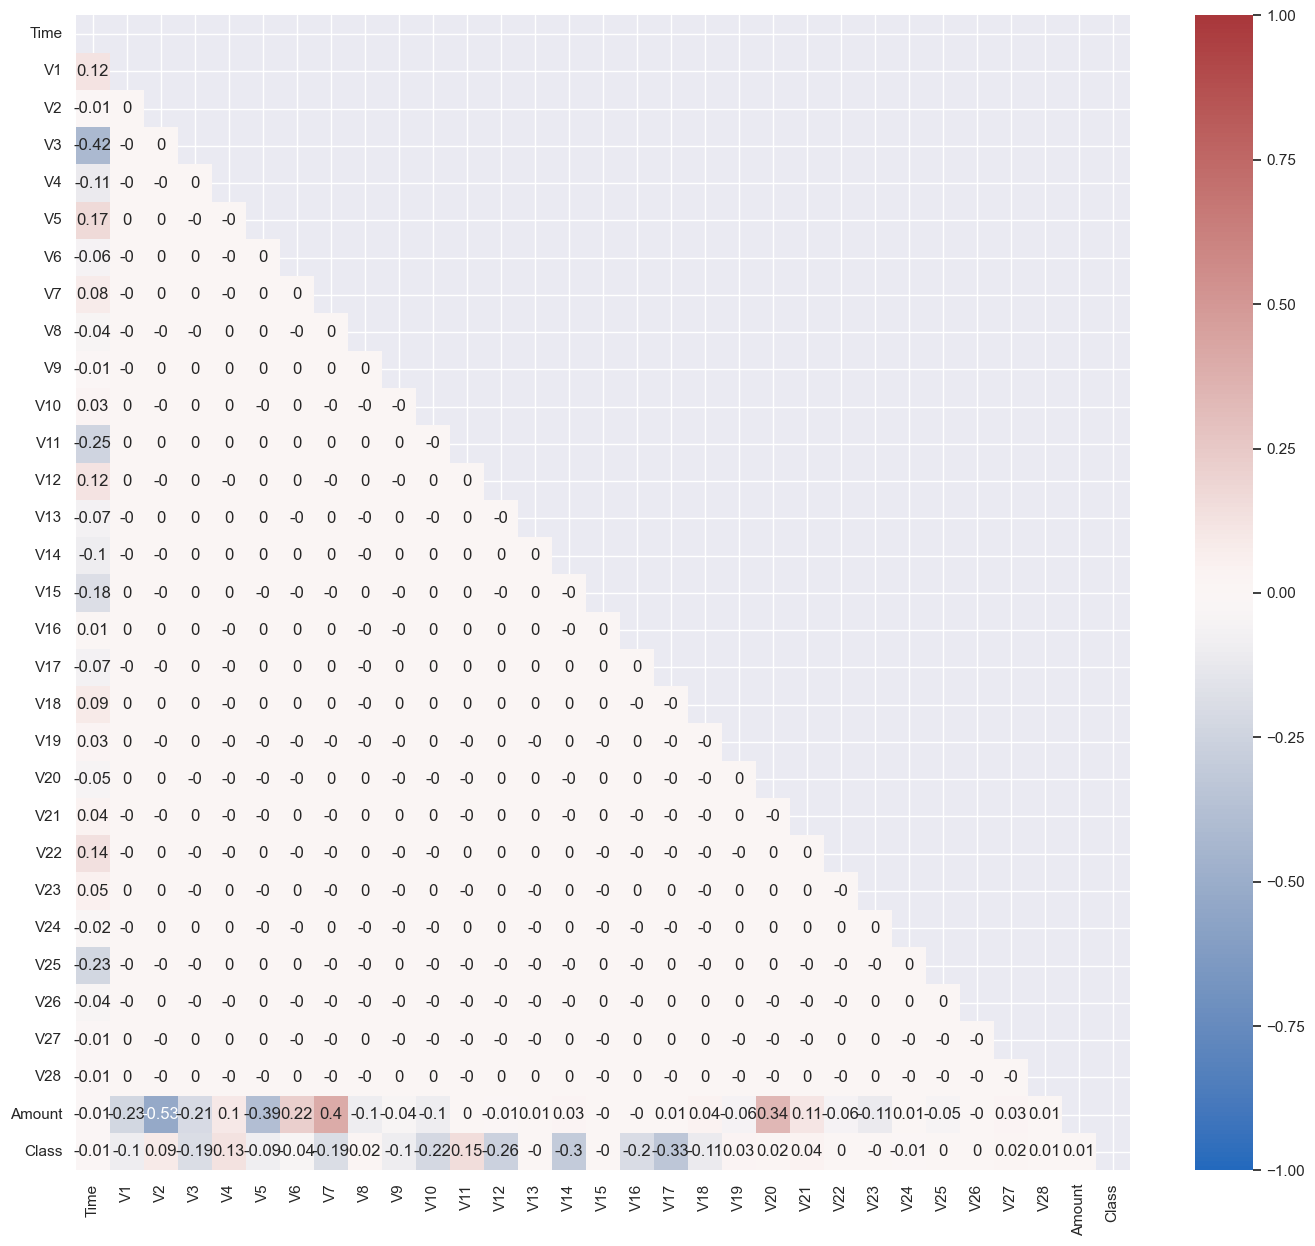

In [6]:
# Корреляционная матрица
f = plt.figure(figsize=(17, 15))
matrix = dataset.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sb.heatmap(matrix, annot=True, vmax=1, vmin=-1, 
            center=0, cmap='vlag', mask=mask)
plt.show()

**Вывод:** Из построенной матрицы корреляции мы можем наблюдать очень мало коррелирующих переменных, как и следовало ожидать после преобразования признаков. Две значимые характеристики — время транзакции и сумма транзакции — имеют некоторую относительную корреляцию с некоторыми переменными с коэффициентами, близкими к 0.4. При таких низких значениях нельзя уверенно предполагать корреляцию между переменными.

In [7]:
# Фильтрация данных с высоким коэффициентом корреляции 
matrix = dataset.corr()
matrix = abs(matrix).unstack()
matrix = matrix[matrix.between(0.5, 1, inclusive='neither')]

print(matrix)

V2      Amount    0.531409
Amount  V2        0.531409
dtype: float64


# 3. Подготовка данных

In [8]:
## Базовая подготовка данных
def basic_processing(data, rename):
    # Переименование переменной
    if rename:
        data.rename(columns=rename, inplace=True)
    
    # Удаление дубликатов
    data.drop_duplicates(keep='first', inplace=True)
    return data

In [9]:
dataset = basic_processing(dataset, rename = {"Class": "target"})
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Импутация данных
def imputation(data):
    # Фильтрация столбцов с пустыми значениями
    null_cols = data.columns[data.isna().any()].tolist()
    
    for col in null_cols:
        # Импутация (столбцы с числовыми данными с помощью медианы)
        if data[col].dtype.kind in 'iufc':
            data[col] = data[col].transform(lambda x: x.fillna(x.median()))
            
        # Импутация (столбцы с нечисловыми данными с помощью моды)
        else:
            data[col] = data[col].transform(lambda x: x.fillna(x.mode()))
    
    return data

In [11]:
# Определение отсутсвующих значений
def identify_missing(data):
    # Подсчет количества null-значений
    sum_nulls = data.isna().sum().sum()
    print("%d null/na values in the dataset:" % sum_nulls)
    
    # Построение графика в том случае, если null-значения присутствуют
    if sum_nulls > 0: 
        plt.figure(figsize=(10,6))
        sb.heatmap(dataset.isna().transpose(),
                    cmap="YlGnBu",
                    cbar_kws={'label': 'Отсутсвующие данные'})
        plt.xlabel("Признаки")
        plt.ylabel("Наблюдения")
        plt.show()
        
        # Импутация с отсутсвующими значениями
        data = imputation(data)
        sum_nulls = data.isna().sum().sum()
        print("После импутации полученные отсутсвюущие значения = {:d}" % sum_nulls)
    return data

In [12]:
dataset = identify_missing(dataset)
dataset.head()

0 null/na values in the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,target
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Вывод:** Отсутствующих значений не выявлено.

**Важно**: Сумма транзакции является единственным значимым числовым признаком ввиду отсутствия отклонений в классах V1, V2, ..., V28.

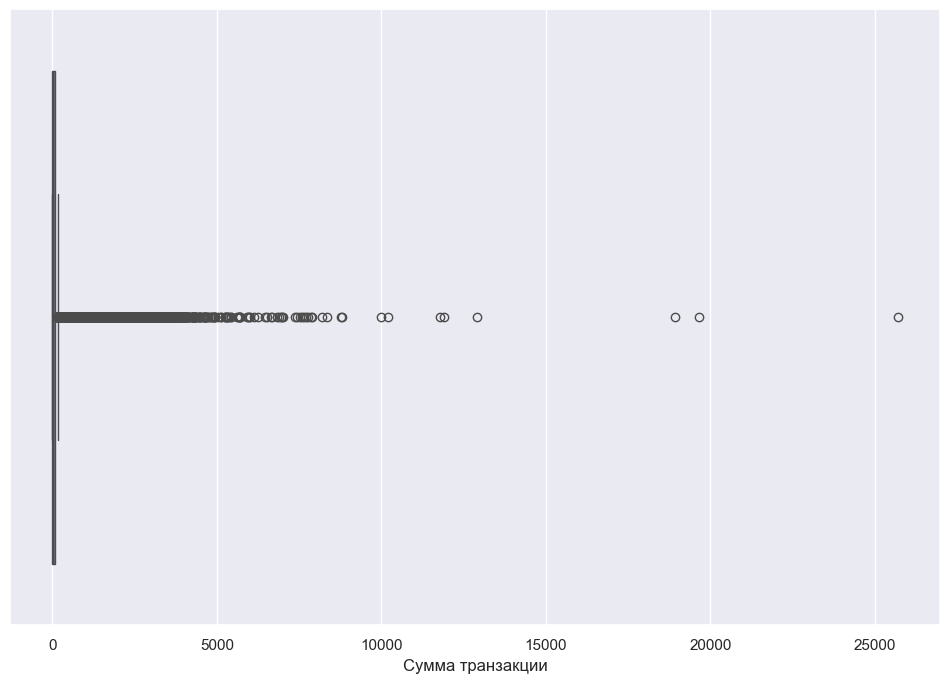

In [13]:
## Отклонения
sb.boxplot(data=dataset, x='Amount')
plt.xlabel('Сумма транзакции')
plt.show()

**Вывод:** На диаграмме мы можем наблюдать немалое количество отклонений в верхней части графика. Это обозначает транзакции на большие суммы, порядка тысячи долларов. Мы оцениваем влияние этого асимметричного распределения при построении прогнозных моделей с точки зрения преобразования признаков или выбора моделей, устойчивых к таким типам признаков.

**Важно:** Продолжим делать то же самое с каждой непрерывной независимой переменной.

In [14]:
# Получение отклонений с помощью z-оценки
def detect_outliers(data, threshold=3):
    print("В ±", threshold, "стандартное отклонение от среднего:")
    for col in data.columns[:-1]:
        # Рассчитаем z-score для каждого предиктора
        var = data[col]
        z = np.abs(stats.zscore(var))

        # Oтклонение
        pos = list(np.where(z > threshold)[0])
        no_of_outliers = len(pos)
        if no_of_outliers > 0:
            print("\t- ", col, "переменная содержит", no_of_outliers,  "отклонений")
            if no_of_outliers < 10:
                outliers = list(var[pos])
                print(outliers)
            else:
                continue

        else:
            print("\t- Отклонений не найдено для переменной", col)

In [15]:
detect_outliers(dataset)

В ± 3 стандартное отклонение от среднего:
	- Отклонений не найдено для переменной Time
	-  V1 переменная содержит 3647 отклонений
	-  V2 переменная содержит 4303 отклонений
	-  V3 переменная содержит 1953 отклонений
	-  V4 переменная содержит 3101 отклонений
	-  V5 переменная содержит 2913 отклонений
	-  V6 переменная содержит 4638 отклонений
	-  V7 переменная содержит 3404 отклонений
	-  V8 переменная содержит 4205 отклонений
	-  V9 переменная содержит 2253 отклонений
	-  V10 переменная содержит 3450 отклонений
	-  V11 переменная содержит 661 отклонений
	-  V12 переменная содержит 3446 отклонений
	-  V13 переменная содержит 1189 отклонений
	-  V14 переменная содержит 3378 отклонений
	-  V15 переменная содержит 1252 отклонений
	-  V16 переменная содержит 2085 отклонений
	-  V17 переменная содержит 2520 отклонений
	-  V18 переменная содержит 1669 отклонений
	-  V19 переменная содержит 3395 отклонений
	-  V20 переменная содержит 4594 отклонений
	-  V21 переменная содержит 4096 отклонений

**Вывод:** Сохраним все отклонения, так как best practice в DS выступает за сохранение как можно большего количества точек данных. Таким образом, мы можем ограничить систематические ошибки как для получения более подходящей модели, так и для получения статистически значимых результатов.

# 4. Исследовательский анализ данных

### Распределение суммы в классе мошеннических транзакций

**Note:** Для получения распределения, разделим наш набор данных по целевым типам; другими словами, мошеннические и валидные транзакции. Затем мы построим гистограмму, чтобы засечь любое нестандартное поведение. При этом видно, что валидные траанзакции имеют сильный перекос вправо, что затрудняет сравнение графиков. Для решения этой проблемы, используем логарифмическое преобразование, которое позволит легче оценить любые сходства и различия.

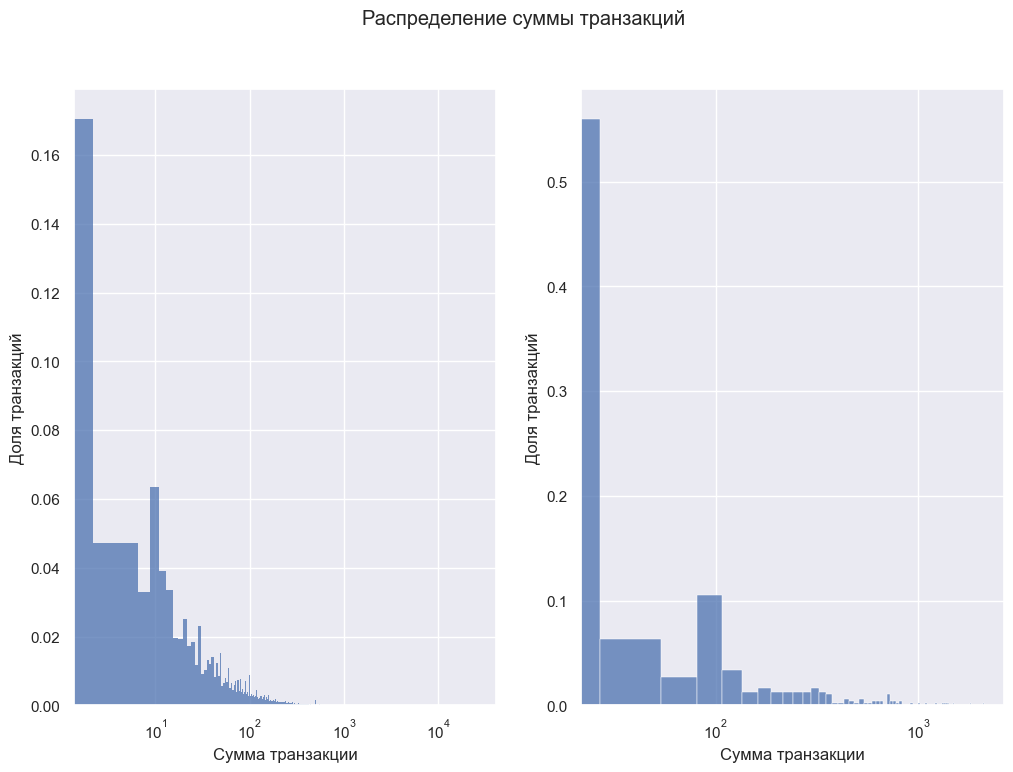

In [16]:
# Разделим данные на валидные и мошеннические
valid = dataset[dataset['target'] == 0]
fraud = dataset[dataset['target'] == 1]

# Гистограмма распределения суммы транзакции в логарифмической шкале
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle('Распределение суммы транзакций')
sb.histplot(ax=ax1, data=valid, x='Amount', stat='probability').set(xscale="log")
sb.histplot(ax=ax2, data=fraud, x='Amount', stat='probability').set(xscale="log")
ax1.set_xlabel('Сумма транзакции')
ax1.set_ylabel('Доля транзакций')
ax2.set_xlabel('Сумма транзакции')
ax2.set_ylabel('Доля транзакций')
plt.show()

### Исследование моментов времени, наиболее распространенных для мошенничества
Проверим время транзакций, чтобы обнаружить аномалии с помощью диаграммы рассеяния.

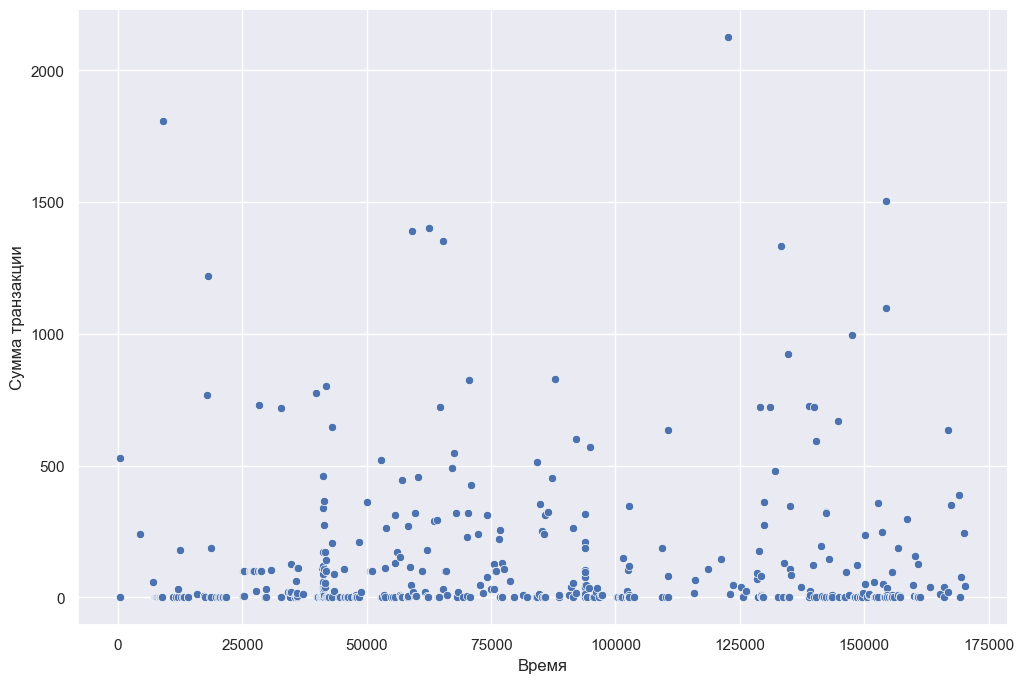

In [17]:
# Диаграмма рассеяния
sb.scatterplot(data=fraud, x='Time', y='Amount')
plt.xlabel('Время')
plt.ylabel('Сумма транзакции')
plt.show()

**Вывод:** На приведенном выше графике не видно, что на определенном временном интервале существует шаблон кластеризации. Предположим, что мошенничество происходило во времени совершенно случайно.

# 5. Дисбаланс в классах данных

Вышеописанный анализ выявил резкий дисбаланс между классами транзакций: мошеннические транзакции составляют лишь 0.2% от всей массы транзакций. Учитывая ограниченный набор примеров для обучения, возникает проблема с построением эффективной модели, позволяющей предсказать факт мошенничества. Поскольку количество мошеннических транзакций мало, ожидается низкая производительность при выполнении критически важной задачи по их обнаружению. Для решения проблемы можно использовать различные алгоритмы семплирования.

**Термины:** 
* **SMOTE** (Synthetic Minority Oversampling Technique) Этот алгоритм основан на идее генерации некоторого количества искусственных примеров, которые были бы похожи на имеющиеся в миноритарном классе, но при этом не дублировали их. Для создания новой записи находят разность векторов признаков "соседних" примеров a и b из миноритарного класса.
* **Near-Miss Algorithm** - алгоритм андерсемплинга, который удаляет примеры мажоритарного класса, для которых среднее расстояние до ближайших соседей (KNN) миноритарного класса является наименьшим. Также может использоваться расстояние до самых дальних соседей, либо среднее расстояние до всех соседей.

In [49]:
def class_imbalance(data):
    # Сплитим признаки (X) и целевые переменные (y)
    X = dataset.drop(columns=['target'], axis=1)
    y = dataset['target']
    
    #SMOTE и Near-Miss
    sampling_alg = [SMOTE(), NearMiss()]

    X_sampled = X
    y_sampled = y
    for alg in sampling_alg:
        X_new, y_new = alg.fit_resample(X_sampled, y_sampled)
        bal = y_new.value_counts(normalize=True) * 100
        X_sampled = X_new
        y_sampled = y_new
    
    bal = y_sampled.value_counts(normalize=True) * 100
    print(f'\nБаланс позитивных и негативных классов (%): \n{bal}\n')
        
    return X_sampled, y_sampled

In [50]:
X, y = class_imbalance(dataset)


Баланс позитивных и негативных классов (%): 
target
0    50.0
1    50.0
Name: proportion, dtype: float64



# 6. Уменьшение размерности

В этом разделе будет использоваться уменьшение размерности, чтобы сократить количество имеющихся признаков. Снижение размерности инкапсулирует методы уменьшения входных переменных в наших обучающих данных. При этом происходит попытка получить эффективную структуру модели машинного обучения и избежать любого потенциального случая переобучения. Мы будем тестировать два метода линейной алгебры: **PCA и SVD** и выберем тот, который отражает наибольшую изменчивость наборов данных после сокращения его до главных компонентов.
* **PCA** (англ. Principal Component Analysis; рус. Анализ главных компонентов) принимает данные с m-столбцами, проецируемыми на подпространство с n-функциями (n < m), сохраняя при этом важную информацию из исходных данных; другими словами, PCA пытается найти **основные компоненты (или функции)**, как следует из его названия.
* **SVD** (англ. Singular Value Decomposition; рус. Разложение по сингулярным значениям) это процесс разложения матрицы на составляющие элементы путем факторизации ее на три отдельные матрицы:: **M=UΣVᵗ**.
    * M: исходная матрица
    * U: левая сингулярная матрица (столбцы — левые сингулярные векторы), содержащая собственные векторы матрицы MMᵗ
    * Σ: диагональная матрица, содержащая сингулярные (собственные) значения
    * V: правая сингулярная матрица (столбцы — правые сингулярные векторы), содержащая собственные векторы матрицы MᵗM

In [51]:
def reduce_dimensions(X, n=5,
                             dimred_methods={
                                 'PCA':PCA(),
                                 'SVD':TruncatedSVD()
                             }
                            ):
    name, result = '', 0
    for method_name, method_func in dimred_methods.items():
        method_func.n_components = n
        method_func.fit_transform(X)
        exp_var = np.sum(method_func.explained_variance_ratio_)
        if exp_var > result:
            name = method_name 
            result = exp_var
        else:
            continue
    final = dimred_methods[name]
    final.n_components = n
    
    return final.fit_transform(X)


In [52]:
X_red = reduce_dimensions(X)

# 7. Машинное обучение

В этом разделе мы объясним процедуру двух основных подходов разделения для оценки производительности моделей.

**Методы выбора моделей:** 
* **Train_test_split**: Часто называемый самым популярным из-за своей простоты, представляет собой метод выборки, разделяющий весь набор данных между на данные для обучения и для тестирования. При этом цель будет состоять в том, чтобы в нашем обучающем наборе, используемом для модели машинного обучения, было достаточно (но не слишком много) данных для максимально точного прогнозирования наблюдений в тестовом наборе. Каждая из моделей выбирает соотношение обучения и тестирования 70/30, соответственно, другие – 80/20, 60/40 или что-то еще, что лучше всего подходит для конкретного сценария.
* **Кросс-валидация**: Перекрестная проверка — это статистический метод, применяемый различными способами для оценки производительности модели. Перекрестная проверка в основном используется в прикладном машинном обучении для оценки квалификации модели машинного обучения на не используемых данных. То есть использовать ограниченную выборку для оценки того, как модель будет работать в целом при использовании ее при прогнозирования на данных, не используемых во время обучения модели.

In [53]:
def model_comparison(X, y, models):
    # Получение наборов данных для обучения и тестирования
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Переменная для хранения основных данных
    models_perf = {'Модель': [], 'Средняя точность': [], 'Стандартное отклонение': [], 'Время(с)': []}
    
    # Получим перфоманс модели с помощью кросс-валидации (K-Fold)
    for model in models:
        start_time = time.time()
        cv_results = cross_validate(model, X_train, y_train, 
                                    cv=3, scoring='average_precision')
        n_scores = abs(cv_results['test_score'])
        models_perf['Модель'].append(str(model))
        models_perf['Средняя точность'].append(np.mean(n_scores))
        models_perf['Стандартное отклонение'].append(np.std(n_scores))
        models_perf['Время(с)'].append(round(time.time() - start_time, 2))
    
    models_df = pd.DataFrame(models_perf, columns = ['Модель', 'Средняя точность', 'Стандартное отклонение', 'Время(с)'])
    return models_df

# 8. Простые модели

В этом разделе будет использован пакет sklearn для создания нескольких моделей практически без настройки параметров для сравнения. Мы будем использовать только ошибку перекрестной проверки в нашем наборе обучающих данных, чтобы избежать утечки данных.

* **Логистическая регрессия** моделирует S-образную кривую (сигмоидальную функцию) на данных для маркировки примеров.
* **K-ближайшие соседи** - это модель машинного обучения, построенная на евклидовом расстоянии и классифицирующая наблюдения.
* **Дерево решений** - это алгоритм машинного обучения с учителем, строящий фактическое дерево на основе разделения данных.

In [54]:
# Список простых ML-моделей
models_simple = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), DecisionTreeClassifier()]

# Сравнение моделей
model_comparison(X_red, y, models_simple)

,Модель,Средняя точность,Стандартное отклонение,Время(с)
0,LogisticRegression(max_iter=1000),0.996289,0.000200,8.56
1,KNeighborsClassifier(),0.970616,0.001189,5.39
2,DecisionTreeClassifier(),0.994869,0.000172,15.43


**Вывод:** Лучшими моделями являются Логистическая регрессия и Дерево решений

# 9. Ансамблевые модели

В этом разделе мы расширим нашу работу в области машинного обучения, включив в нее ансамблевые модели. В данной задаче может потребоваться большая стабильность и незначительные изменения в нашем алгоритме прогнозирования; именно здесь на помощь приходят ансамблевые модели. Чаще всего они действуют как суперпозиция нескольких моделей различными способами и, таким образом, усиливают их предсказательную силу.
* **Случайный лес** основывается на логике деревьев решений путем объединения нескольких деревьев и получения заданного прогноза в результате решения большинства; другими словами, это дерево решений, умноженное на n (количество деревьев).
* **Стохастический градиентный бустинг** является частью более сложных ансамблевых моделей (бустинга), позволяющих учиться на ошибках предыдущих моделей и выстраивать процесс последовательного улучшения.

In [36]:
# Ансамблевые модели
models_ensemble = [RandomForestClassifier(),
                   GradientBoostingClassifier()]

# Сравнение моделей
model_comparison(X_red, y, models_ensemble)

,Модель,Средняя точность,Отклонение,Время(с)
0,RandomForestClassifier(),0.999981,0.000013,211.89
1,GradientBoostingClassifier(),0.996661,0.000509,247.75


**Вывод:** В обоих случаях ансамблевые методы являются более производительными, чем обычные ML-модели.

# 10. AUPRC и AUC-ROC

В данном разделе будет выбрана лучшая модель с использованием AURPC и AUC-ROC. 
**Area Under the Precision-Recall Curve (AUPRC)** фокусируется на поиске положительных примеров; другими словами, в нашем случае это мошеннические транзакции.

**Recall** = Истинные позитивы / (Истинные позитивы + Ложные негативы). Recall может рассматриваться как способность классификатора правильно пометить все положительные примеры как положительные.
**Precision** = Истинные Позитивы / (Истинные Позитивы + Ложные Позитивы). Precision можно рассматривать как способность классификатора не ошибочно маркировать отрицательный образец как положительный.

**ROC-кривая** — график, позволяющий оценить качество бинарной классификации, отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак (англ. true positive rate, TPR, называемой чувствительностью алгоритма классификации), и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак (англ. false positive rate, FPR, величина 1-FPR называется специфичностью алгоритма классификации) при варьировании порога решающего правила..

Количественная интерпретация ROC даёт показатель AUC (англ. Area Under Curve, площадь под кривой) — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. Чем выше показатель AUC, тем качественнее классификатор, при этом значение 0,5 демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее 0,5 говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

In [43]:
def calculateAUPRC(
    X, 
    y,     
    models={
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'K Neighbours': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
    }
):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    # Разделение данных и подбор модели
    models_perf = {'Model': [], 'AUPRC': [], 'AUC-ROC': []}
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    fig.suptitle('Оценка модели по AUPRC и AUC-ROC')
    ax1.set_xlabel('Recall')
    ax1.set_ylabel('Precision')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    for method_name, method_func in models.items():
        print(f'\n{method_name}: start\n')
        final_clf = method_func
        final_clf.fit(X_train, y_train)
        y_pred = final_clf.predict(X_test)
        auprc = skm.average_precision_score(y_test, y_pred)
        auc_roc = skm.roc_auc_score(y_test, y_pred)
        lr_precision, lr_recall, _ = skm.precision_recall_curve(y_test, y_pred)
        lr_fpr, lr_tpr, _ = skm.roc_curve(y_test, y_pred)
        # plot the roc curve for the model
        ax1.plot(lr_recall, lr_precision, label=method_name)
        ax2.plot(lr_fpr, lr_tpr, label=method_name)
        models_perf['Model'].append(method_name)
        models_perf['AUPRC'].append(auprc)
        models_perf['AUC-ROC'].append(auc_roc)
        print(f'\n{method_name}: finish\n')
    ax1.set_title("AUPRC")
    ax1.legend(loc="lower left")
    ax2.set_title("AUC-ROC")
    ax2.legend(loc="lower right")
    plt.legend()
    plt.show()
    models_df = pd.DataFrame(models_perf, columns = ['Model', 'AUPRC', 'AUC-ROC'])
    return models_df


Logistic Regression: start


Logistic Regression: finish


K Neighbours: start


K Neighbours: finish


Decision Tree: start


Decision Tree: finish


Random Forest: start


Random Forest: finish


Gradient Boosting: start


Gradient Boosting: finish



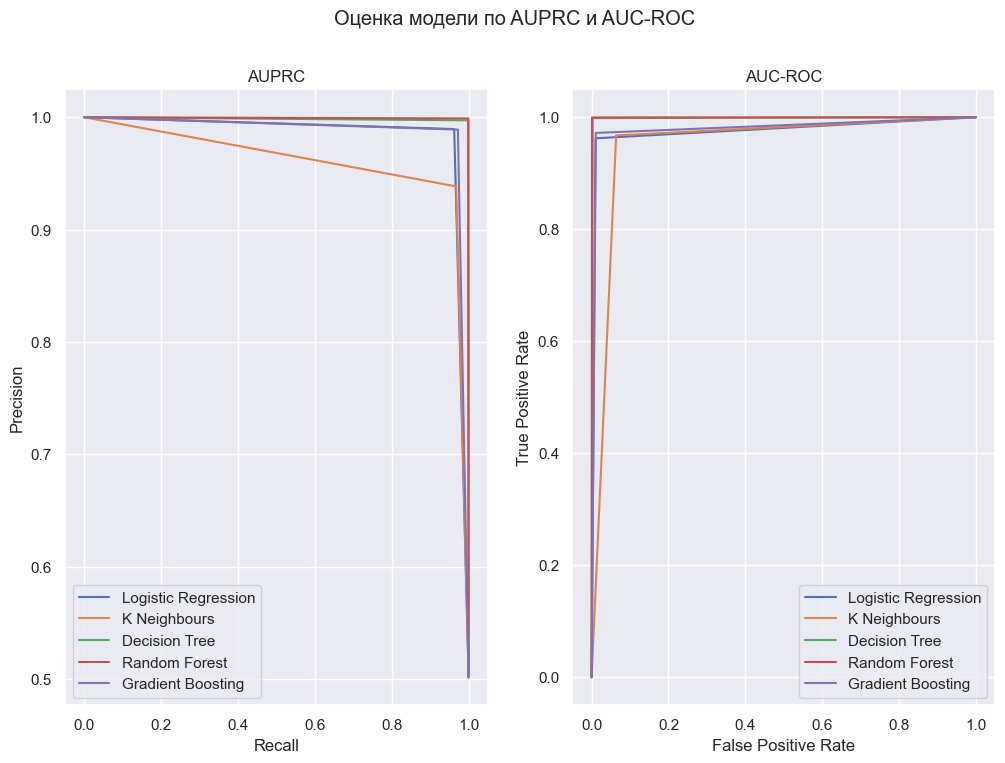

,Model,AUPRC,AUC-ROC
0,Logistic Regression,0.971144,0.976069
1,K Neighbours,0.924269,0.951863
2,Decision Tree,0.996483,0.997845
3,Random Forest,0.998756,0.999272
4,Gradient Boosting,0.975351,0.980566


In [44]:
calculateAUPRC(X_red, y)

**Вывод:** Decision Tree является наиболее точной с точки зрения AUPRC и наиболее производительной моделью.


Logistic Regression: start


Logistic Regression: finish


K Neighbours: start


K Neighbours: finish


Decision Tree: start


Decision Tree: finish


Random Forest: start


Random Forest: finish


Gradient Boosting: start


Gradient Boosting: finish



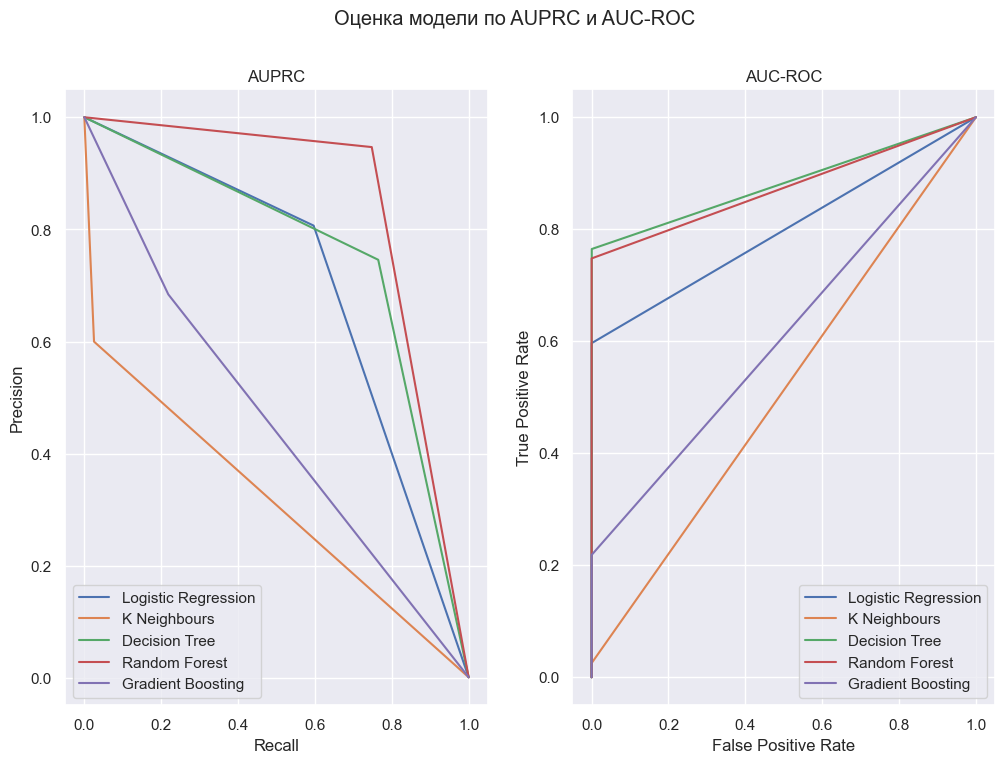

,Model,AUPRC,AUC-ROC
0,Logistic Regression,0.482056,0.798199
1,K Neighbours,0.016761,0.512591
2,Decision Tree,0.570790,0.882134
3,Random Forest,0.708540,0.873914
4,Gradient Boosting,0.150802,0.609159


In [45]:
X = dataset.drop(columns=['target'], axis=1)
y = dataset['target']
calculateAUPRC(X, y)